In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

load datasets

In [8]:
iris = load_iris()
X = iris.data
y = iris.target

X = pd.DataFrame(X, columns=iris.feature_names)
X["Target"] = y
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Spliting

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)


In [11]:
x_train.shape

(120, 4)

Build Structure


In [12]:
model=Sequential()
model.add(Dense(10,input_shape=(x.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3,activation='softmax'))

c:\Users\GIGABYTE\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
history=model.fit(x_train,y_train,epochs=15,batch_size=10,verbose=1,validation_split=0.2)


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.2812 - loss: 2.2308 - val_accuracy: 0.5000 - val_loss: 1.5654
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2812 - loss: 1.9203 - val_accuracy: 0.5000 - val_loss: 1.3445
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2812 - loss: 1.6449 - val_accuracy: 0.5000 - val_loss: 1.1739
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2812 - loss: 1.4423 - val_accuracy: 0.5000 - val_loss: 1.0510
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4062 - loss: 1.2780 - val_accuracy: 0.6250 - val_loss: 0.9618
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6146 - loss: 1.1430 - val_accuracy: 0.7083 - val_loss: 0.8914
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6458 - loss: 1.0256 - val_accuracy: 0.7083 - val_loss: 0.8439
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6458 - loss: 0.9437 - val_accuracy: 0.7083 - v

In [16]:
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8000 - loss: 0.6735 
[0.6734944581985474, 0.800000011920929]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7667 - loss: 0.6637
[0.6636651754379272, 0.7666666507720947]


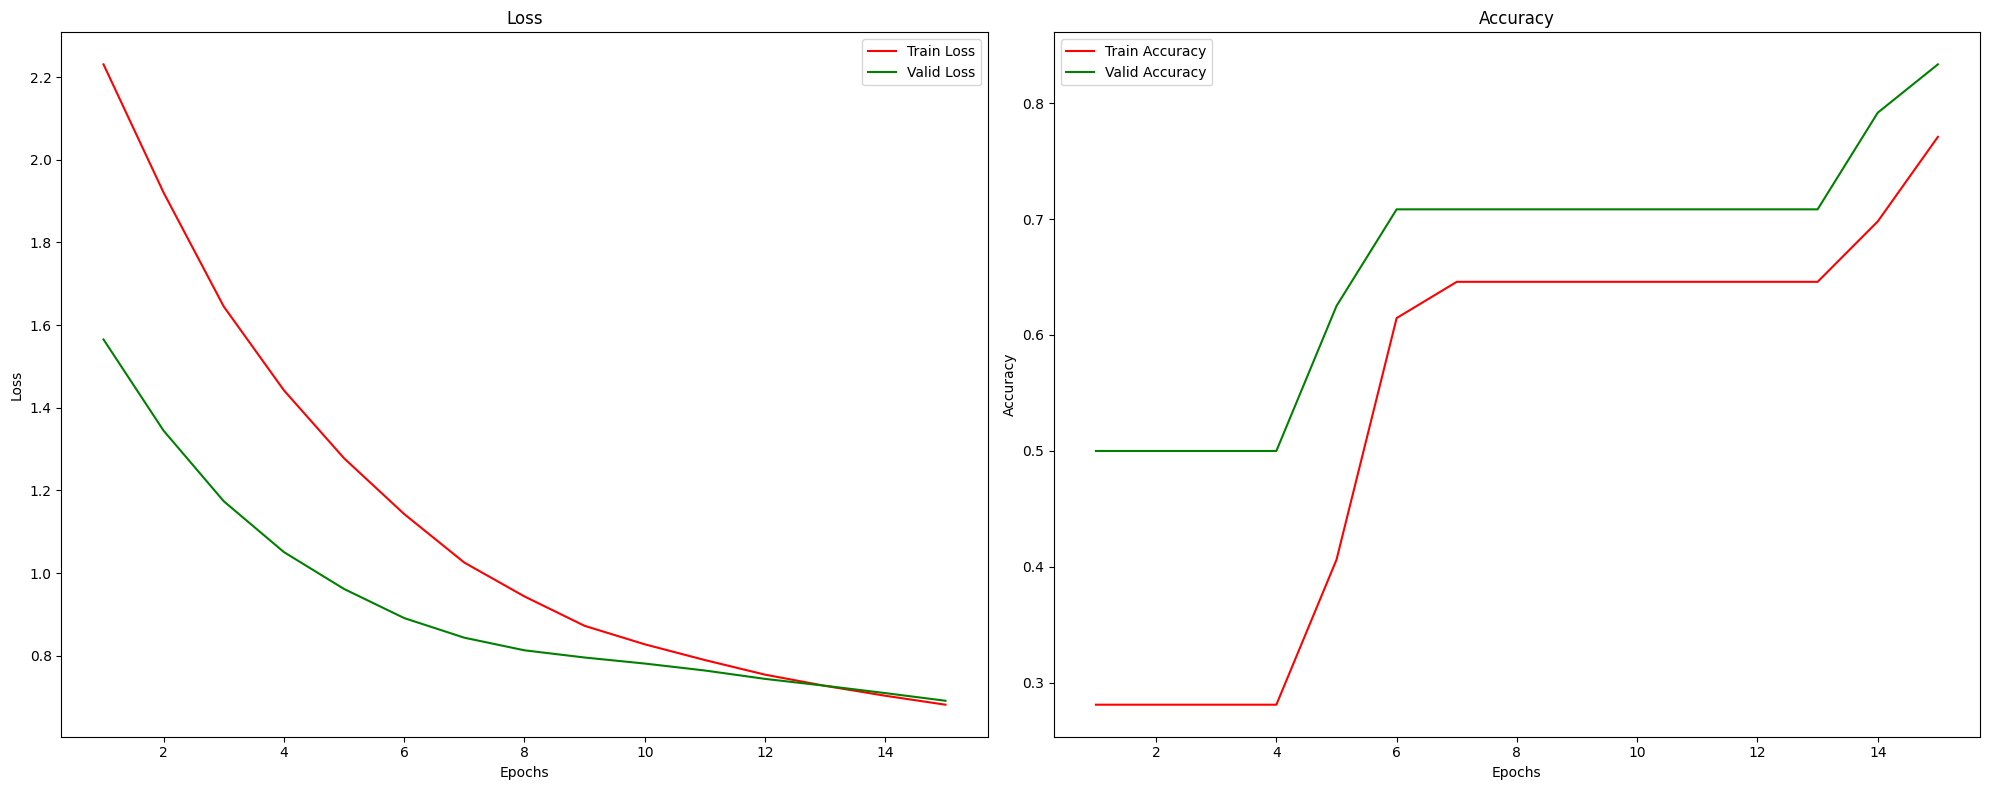

In [19]:
tr_acc=history.history['accuracy']
tr_loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

epochs=[i+1 for i in range (len(tr_acc))]

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [20]:
y_pred=model.predict(x_test)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
[[0.24648021 0.3496837  0.4038361 ]
 [0.73594636 0.19972081 0.06433285]
 [0.10234749 0.19641759 0.70123494]
 [0.24600798 0.35925645 0.39473557]
 [0.2084684  0.3328777  0.45865393]
 [0.70368904 0.21872796 0.07758305]
 [0.35856897 0.35477406 0.28665692]
 [0.18506369 0.31268302 0.5022533 ]
 [0.1787295  0.30109715 0.5201734 ]
 [0.28805554 0.36691004 0.34503436]
 [0.20356177 0.33976343 0.45667478]
 [0.6749653  0.2363121  0.08872253]
 [0.7354401  0.20151787 0.06304204]
 [0.6771569  0.23546776 0.08737531]
 [0.7556294  0.18849623 0.05587434]
 [0.27559724 0.3679839  0.35641885]
 [0.16261274 0.2879067  0.54948056]
 [0.26876447 0.3650679  0.36616758]
 [0.25850245 0.35884538 0.38265213]
 [0.161122   0.28262037 0.5562576 ]
 [0.67980266 0.23395932 0.08623799]
 [0.21474938 0.34223124 0.44301942]
 [0.69948196 0.22090028 0.07961778]
 [0.16252719 0.2846553  0.5528175 ]
 [0.1802257  0.31567785 0.5040965 ]
 [0.17411277 0.30938748 0.5164997 ]
 [0.14419964 0.25590262 0

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

y_pred_labels = np.argmax(y_pred, axis=1)
print(y_pred_labels)
print(accuracy_score(y_test, y_pred_labels))


[2 0 2 2 2 0 0 2 2 1 2 0 0 0 0 1 2 2 2 2 0 2 0 2 2 2 2 2 0 0]
0.7666666666666667


<Axes: >

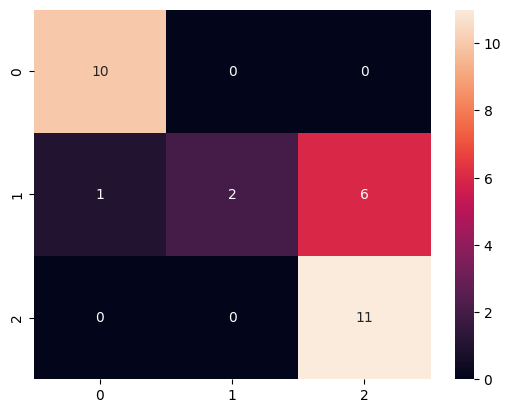

In [22]:
con = confusion_matrix(y_test , y_pred_labels)
sns.heatmap(con,annot=True)

Save a model

In [23]:
model.save('model.h5')

using model



In [25]:
from tensorflow.keras.models import load_model
model = load_model("model.h5")

In [27]:
sample = [[5.1, 3.5, 1.4, 0.2]]
pred = model.predict(np.array(sample))
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
[[0.73158616 0.20367038 0.06474346]]
